In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import xgboost as xgb
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [122]:
target_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQEWVi3GGO24iKF2MBPJkUrPteNcs0ornieVOGYiWCDsqmH1qWCXutNd2QQcaY2xgrlGqx5_cbWjFa_/pub?output=csv'

In [123]:
mobile_train = pd.read_csv(target_url)

mobile_train.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2


In [125]:
mobile_train['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [128]:
mobile_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [129]:
mobile_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## Univariate analysis

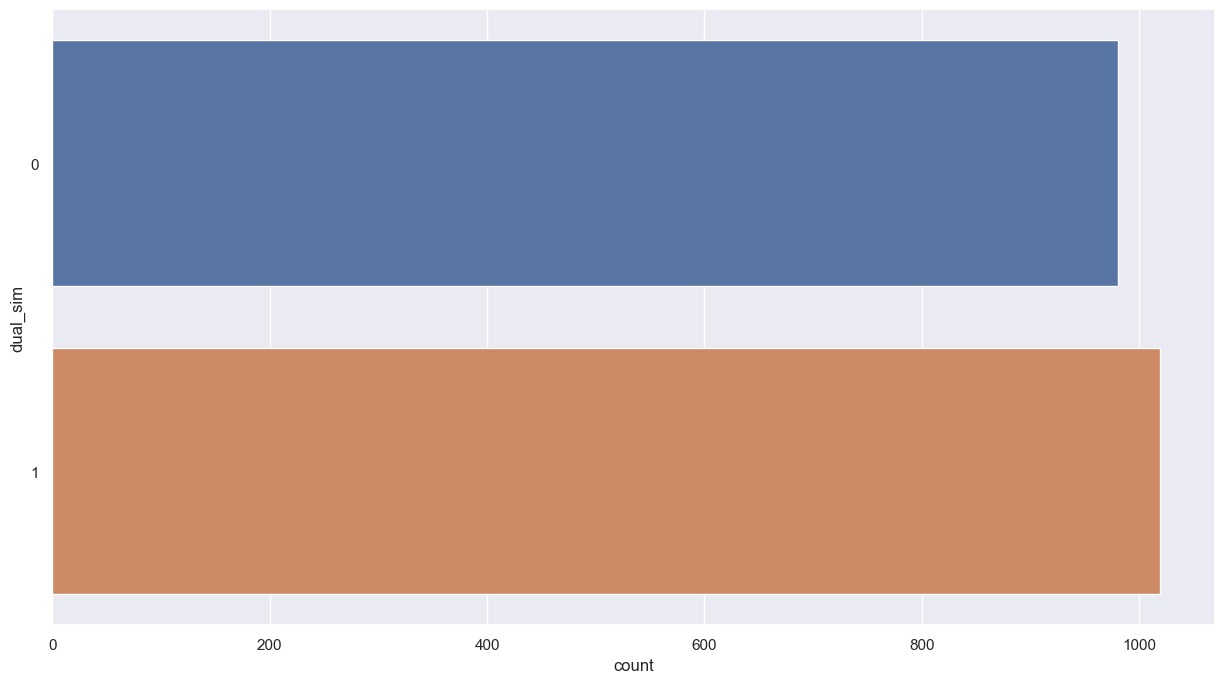

In [130]:
plt.figure(figsize = (15,8)) #showing width and height ; 15 is width, 8 is height
sns.set(style = 'darkgrid')
sns.countplot(y = mobile_train['dual_sim'])
plt.show()

The above chart implies that there are more dual sim phones sold in the market

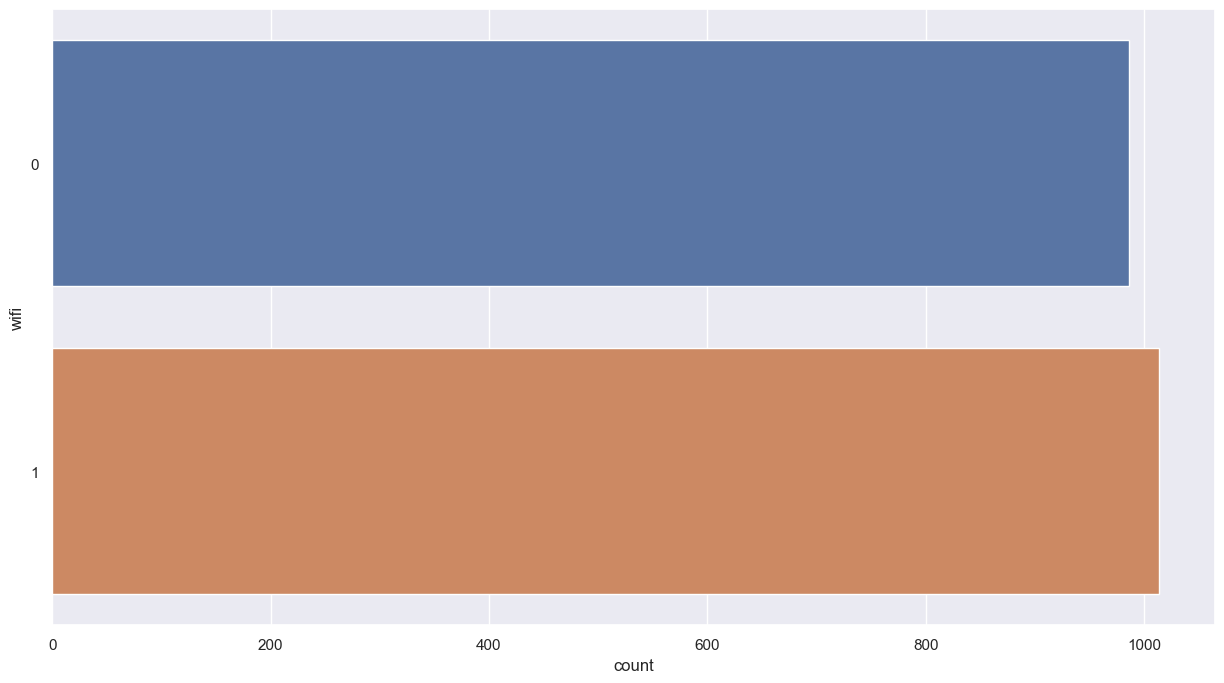

In [131]:
plt.figure(figsize = (15,8)) #showing width and height ; 15 is width, 8 is height
sns.set(style = 'darkgrid')
sns.countplot(y = mobile_train['wifi'])
plt.show()

The above chart implies that there are more wifi phones sold in the market

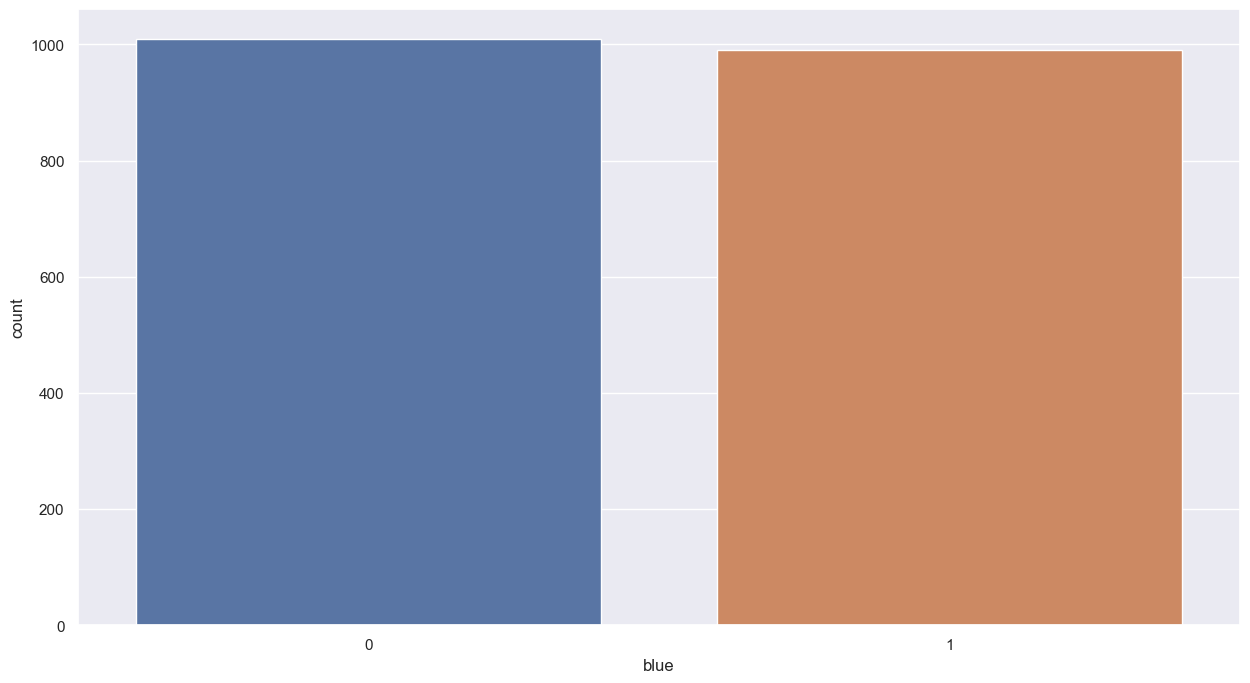

In [132]:
plt.figure(figsize = (15,8)) #showing width and height ; 15 is width, 8 is height
sns.set(style = 'darkgrid')
sns.countplot(x = mobile_train['blue'])
plt.show()

The above chart implies that phones without bluetooth are sold more in the market

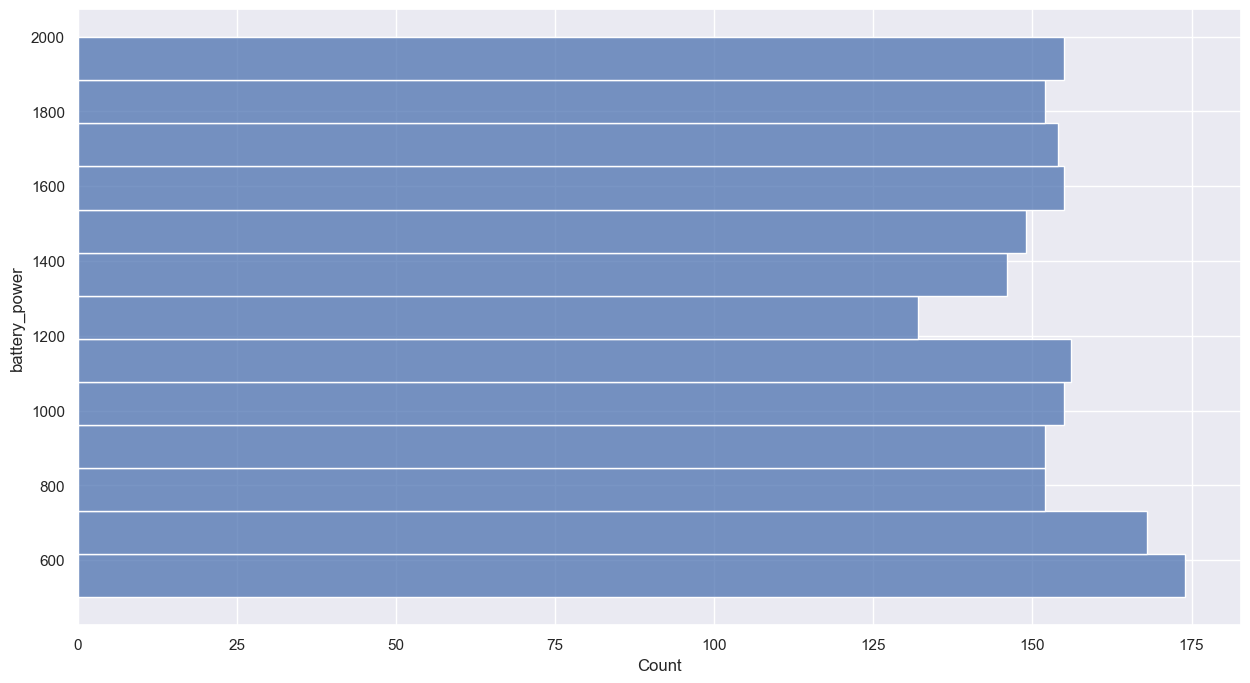

In [133]:
plt.figure(figsize = (15,8)) #showing width and height ; 15 is width, 8 is height
sns.set(style = 'darkgrid')
sns.histplot(y = mobile_train['battery_power'])
plt.show()

The above implies that phones with weaker battery lives are sold more than phones with longer battery lives

## Bivariate analysis

In [134]:
mapping_dictionary = {0: 'No', 1: 'Yes'}
bivariate_columns = mobile_train[['dual_sim', 'wifi', 'blue']]
bivariate_columns.replace(mapping_dictionary, inplace=True)
bivariate_columns.head(3)

,dual_sim,wifi,blue
0,No,Yes,No
1,Yes,No,Yes
2,Yes,No,Yes


In [135]:
mobile_train['price_range']

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

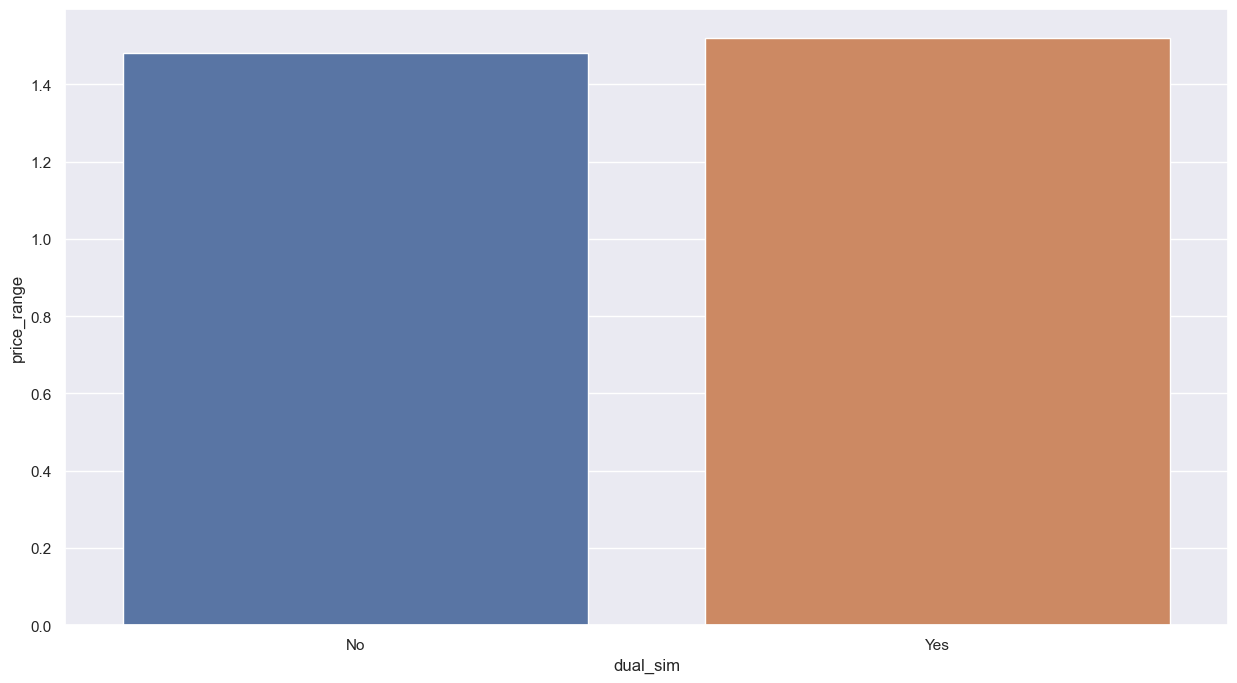

In [136]:
plt.figure(figsize=(15,8))
sns.set(style = 'darkgrid')
sns.barplot(y = mobile_train['price_range'], x = bivariate_columns['dual_sim'],ci=0)
plt.show()

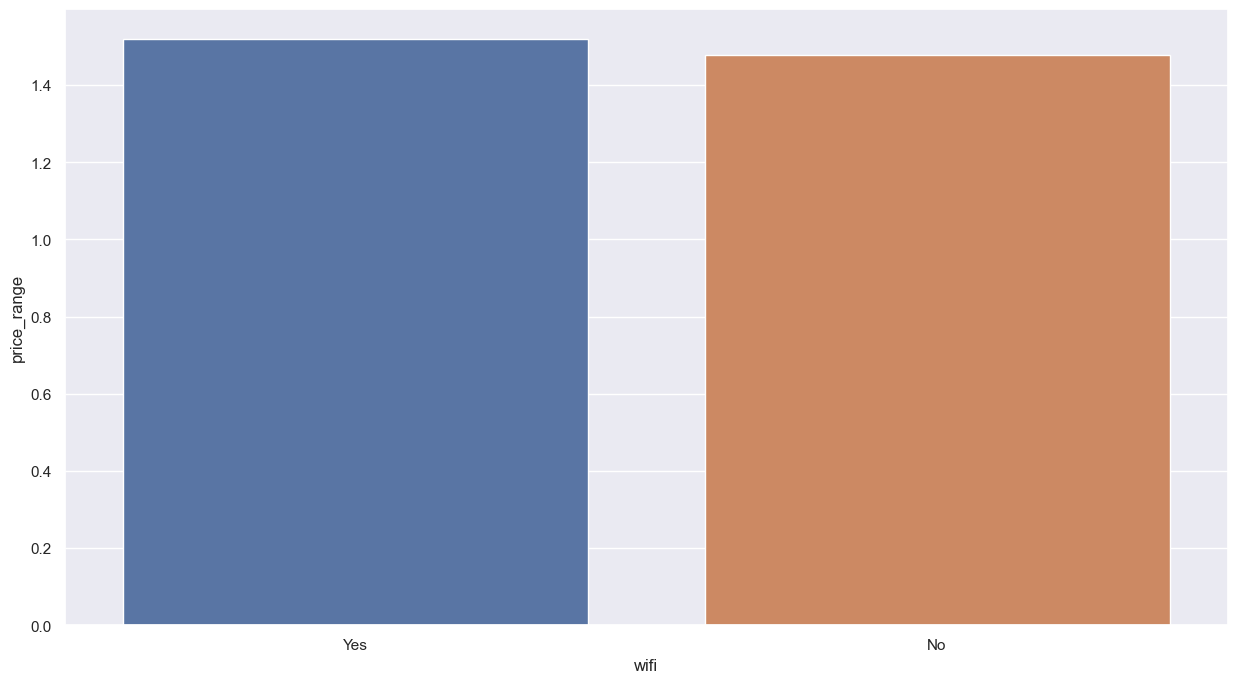

In [137]:
plt.figure(figsize=(15,8))
sns.set(style = 'darkgrid')
sns.barplot(y = mobile_train['price_range'], x = bivariate_columns['wifi'],ci=0)
plt.show()

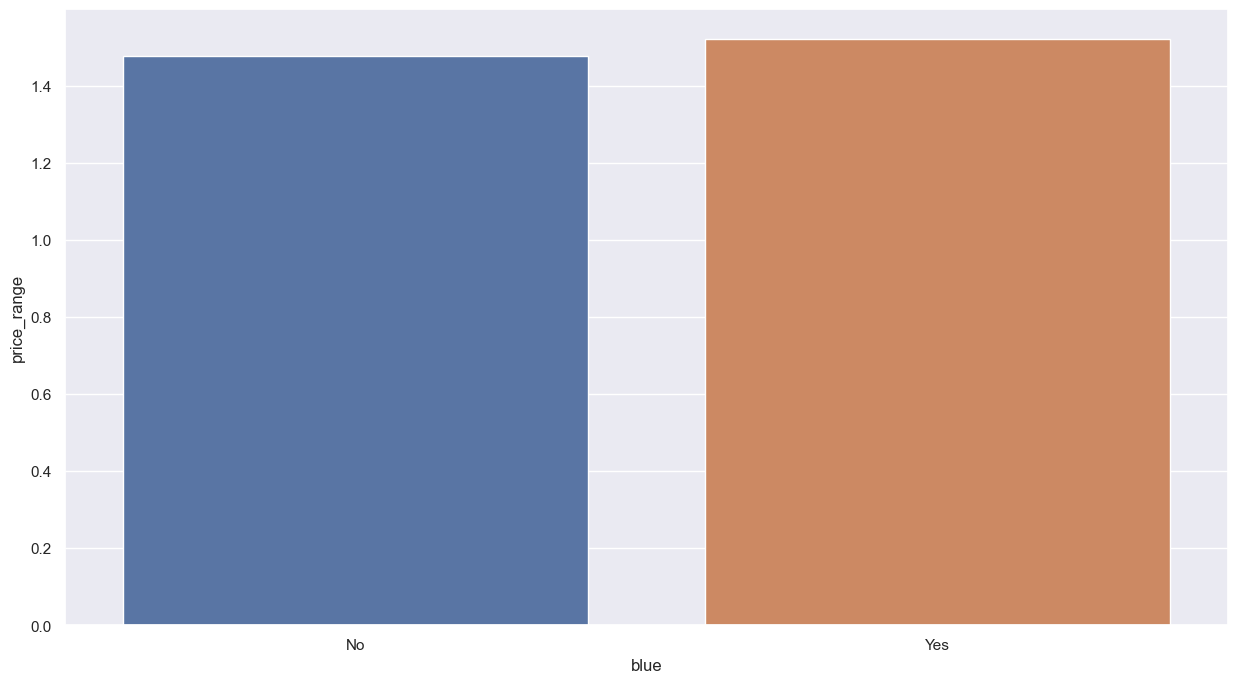

In [138]:
plt.figure(figsize=(15,8))
sns.set(style = 'darkgrid')
sns.barplot(y = mobile_train['price_range'], x = bivariate_columns['blue'],ci=0)
plt.show()

The above charts imply that phones with dual_sim, bluetooth and wifi are more expensive than phones without.

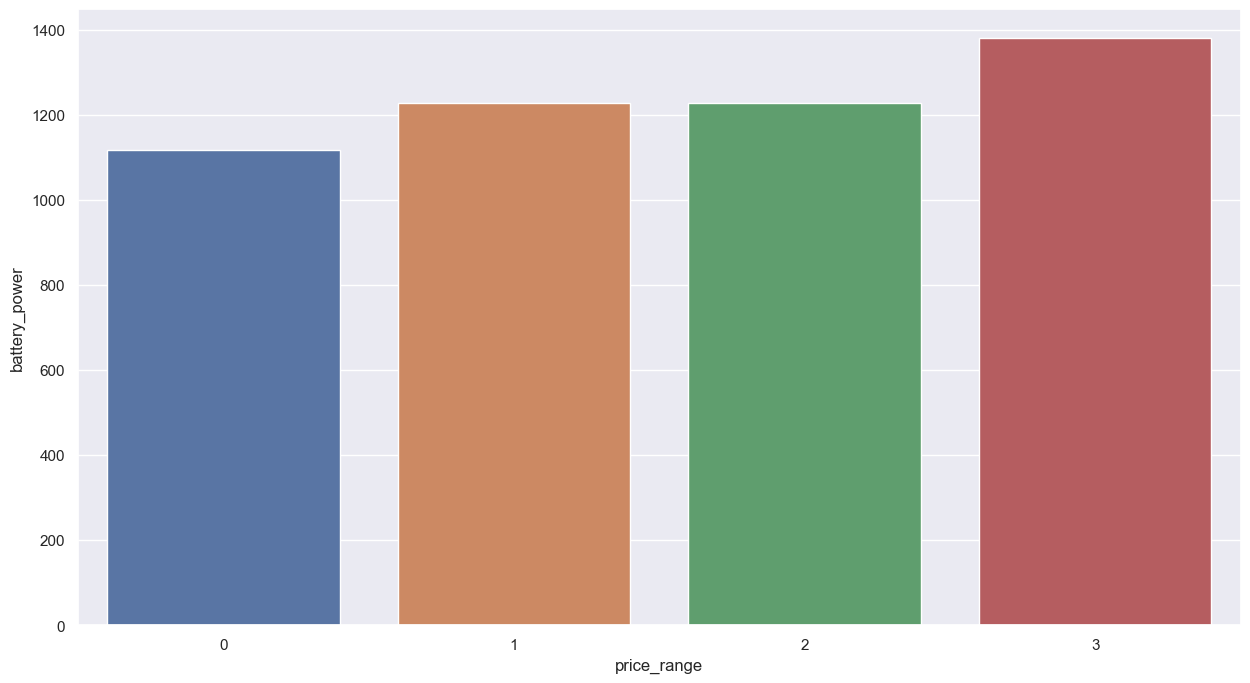

In [139]:
plt.figure(figsize=(15,8))
sns.set(style = 'darkgrid')
sns.barplot(x = mobile_train['price_range'], y = mobile_train['battery_power'],ci=0)
plt.show()

While the above chart implies that the higher the battery power, the more expensive the phone is likely to be.

## Multivariate analysis

<AxesSubplot:>

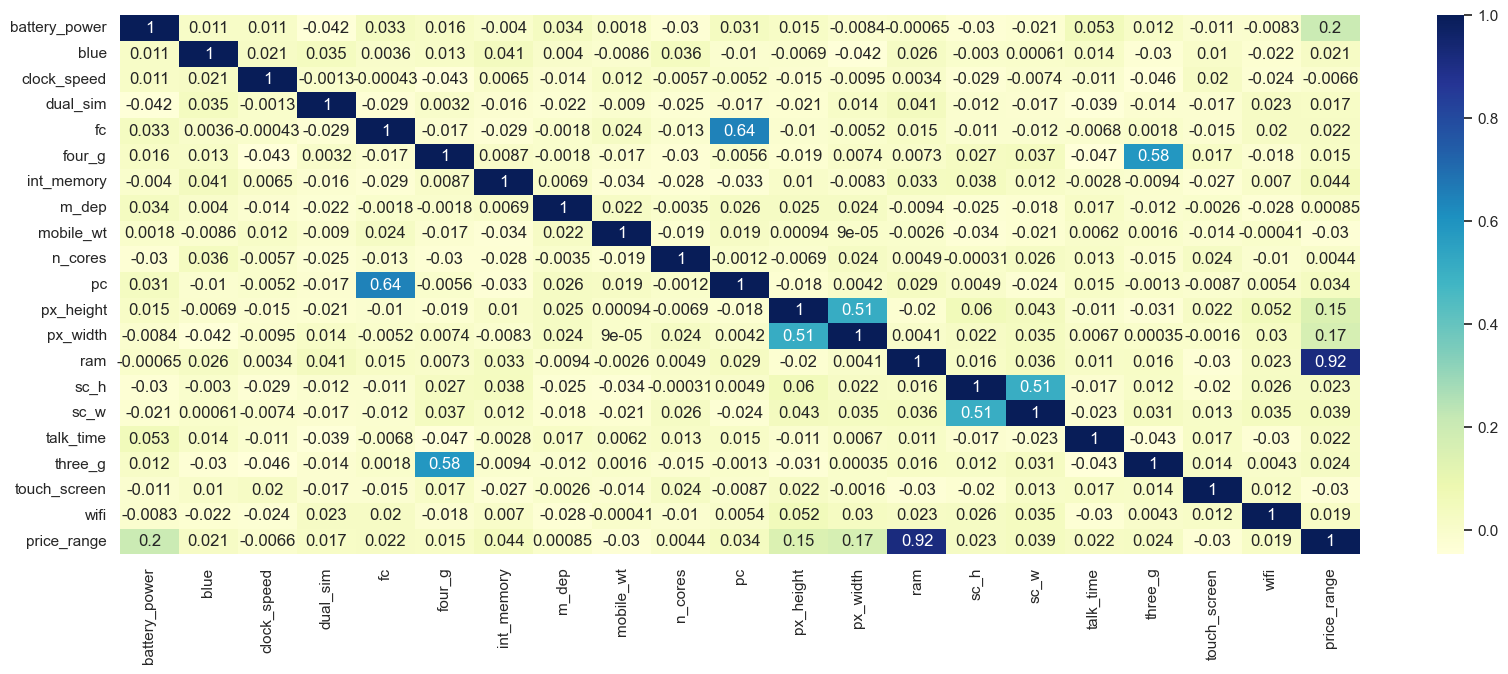

In [140]:
plt.figure(figsize=(20,7))
sns.heatmap(mobile_train.corr(),cmap='YlGnBu',annot=True)

## Feature Selection and Modelling

1. Assign your x and y variables

In [141]:
x = mobile_train.drop(['price_range'], axis = 1)
y = mobile_train.price_range

In [142]:
x.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0


2. Standardize the dataset, using standardscaler

In [143]:
scaler = StandardScaler() # ....................................................... instantiate the scaler and save it to a variable name
# mt_scaled = pd.DataFrame() # .................................................... Create a dataframe to contain the scaled features
for i in x.columns: # ........................................................... Loop through all the columns in x
  x[[i]] = scaler.fit_transform(x[[i]]) # ...................... Scale them and save them sd columns in the alrerady prerpared dataframe

x.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099


3. Use Feature Selection tools to determine which features would be most suitable for modelling

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

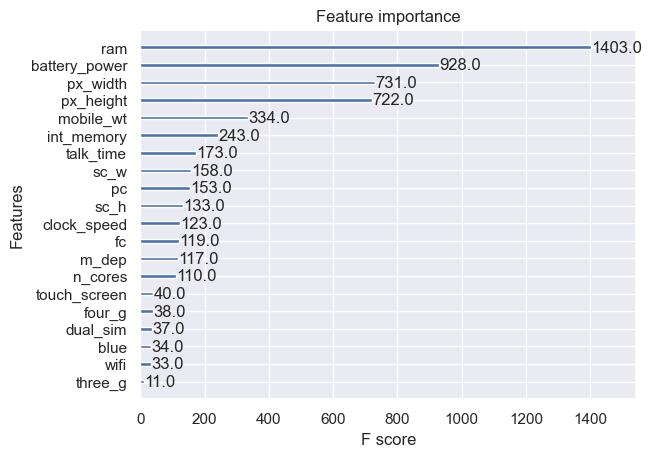

In [144]:
# Using the Select K best and XGBoost Feature elimination Method

# - Using XGBOOST to find feature importance
model = xgb.XGBClassifier()
model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model)

In [145]:
# ANOVA F-value between label/feature

best_feature1 = SelectKBest(score_func = f_classif, k = 15)
fitting1 = best_feature1.fit(x,y)
scores1 = pd.DataFrame(fitting1.scores_)
columns1 = pd.DataFrame(x.columns)
feat_score1 = pd.concat([columns1, scores1], axis = 1)
feat_score1.columns = ['Feature', 'F_classif_score']
k1 = feat_score1.nlargest(15, 'F_classif_score')

k1.sort_values(by = 'F_classif_score', ascending = False)

,Feature,F_classif_score
13,ram,3520.110824
0,battery_power,31.598158
12,px_width,22.620882
11,px_height,19.484842
8,mobile_wt,3.594318
6,int_memory,2.922996
9,n_cores,2.625415
14,sc_h,2.225984
15,sc_w,1.671000
16,talk_time,1.628811


Based on results from the tools used above, the following features are the weightiest wrt the price range: ram, battery_power, px_width, px_height.

But, we will model with the full set of features first, and compare with modelling results from the limited set of features.

### MODELLING WITH FULL SET OF FEATURES

4. Create model by splitting data set into test and train sets

In [146]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.15, random_state = 30, stratify = y)
print(f"X Train rows and column: {x_train.shape}")
print(f"Y Train rows and column: {y_train.shape}")
print(f"X Test rows and column: {x_test.shape}")
print(f"Y Test rows and column: {y_test.shape}")

X Train rows and column: (1700, 20)
Y Train rows and column: (1700,)
X Test rows and column: (300, 20)
Y Test rows and column: (300,)


In [147]:
train = pd.concat([x_train, y_train], axis = 1) # ...............................Join the x and y train dataset together
print('train dataframe: ',train.shape)
test = pd.concat([x_test, y_test], axis = 1) #...................................Join the x and y test dataset together
print('test dataframe: ',test.shape)

train dataframe:  (1700, 21)
test dataframe:  (300, 21)


In [148]:
pd.set_option('display.max_columns', None)

In [149]:
train.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
717,0.360752,-0.990050,1.075937,0.981177,0.159088,0.957886,-1.601136,-1.046495,-0.543898,-0.664768,0.838474,-0.478076,0.940737,-0.688096,1.351672,2.119942,-1.283457,0.559641,0.994018,0.986097,1
124,-0.165074,-0.990050,0.585621,-1.019184,-0.301703,0.957886,-0.388426,1.034357,1.631808,0.209639,-0.975869,-1.321045,-0.112281,0.335454,0.164641,-0.176107,0.730240,0.559641,-1.006018,-1.014099,2
1752,1.592234,1.010051,-1.253064,0.981177,0.159088,-1.043966,0.658915,-0.006069,-0.543898,-1.101971,-0.151168,1.473826,1.581805,1.265871,1.351672,0.971917,1.279430,-1.786861,0.994018,-1.014099,3


In [150]:
test.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1700,-1.130228,1.010051,-1.253064,-1.019184,-0.99289,0.957886,0.217930,0.687548,-0.035292,-0.664768,-1.470690,1.162784,0.084437,-1.689515,-1.022389,-1.324131,-0.917331,0.559641,0.994018,0.986097,0
909,-0.843413,-0.990050,0.217884,-1.019184,-0.99289,-1.043966,-0.112810,1.034357,-1.617624,-0.227564,-1.635631,-0.831943,-0.521916,-0.434514,-0.310171,0.283103,1.096367,0.559641,-1.006018,-1.014099,1
844,1.701496,-0.990050,-1.253064,-1.019184,0.61988,-1.043966,1.044778,-0.352878,-1.278552,-0.664768,-0.151168,-0.683184,-1.105126,0.959728,-1.734608,-1.324131,0.364113,0.559641,-1.006018,-1.014099,3


5. Carry out logistic regression

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           1       0.95      0.97      0.96        75
           2       0.99      0.92      0.95        75
           3       0.96      0.99      0.97        75

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



<AxesSubplot:>

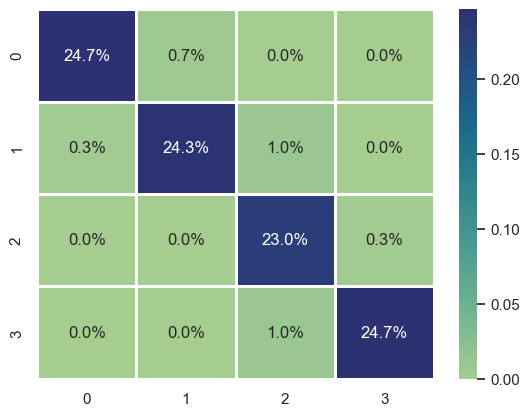

In [151]:
logistic = LogisticRegression()

# Model Creation
logistic.fit(x_train, y_train)

# Predict the test data for checking accuracy
logistic_prediction = logistic.predict(x_test)

# Checking for accuracy using classification report
print(classification_report(y_test, logistic_prediction))
revealer = confusion_matrix(logistic_prediction, y_test)

sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', fmt='.1%', linewidth=1)

In [152]:
# Create a dataframe to show the errors of the predictions

pred_df = pd.DataFrame({'Actual Y Value':y_test,'Predicted Y Value':logistic_prediction})
pred_df.head(10)

,Actual Y Value,Predicted Y Value
1700,0,0
909,1,1
844,3,3
1254,0,0
519,3,3
1712,2,2
1403,2,2
91,2,2
33,3,3
690,3,3


In [153]:
# do a random test using data from the original dataframe
print(logistic.predict([[1397,	0,	2.4,	1,	5,	1,	3,	0.2,	121,	3,	15,	433,	1658,	1378,	18,	15,	4,	1,	1,	1]])) # Train set - 1
print(logistic.predict([[1986,	0,	0.5,	0,	7,	0,	51,	0.4,	95,	3,	9,	342,	774,	3165,	5,	0,	13,	1,	0,	0]])) # Test set - 3

[3]
[3]


### MODELLING WITH WEIGHTIEST FEATURES (FOR COMPARISON)

In [154]:
modified_x = x[['ram', 'battery_power', 'px_height', 'px_width']]
modified_x.head(2)

,ram,battery_power,px_height,px_width
0,0.391703,-0.902597,-1.408949,-1.146784
1,0.467317,-0.495139,0.585778,1.704465


In [155]:
mod_x_train, mod_x_test, mod_y_train, mod_y_test = train_test_split(modified_x, y, test_size = 0.15, random_state = 30, stratify = y)
mod_train = pd.concat([mod_x_train, mod_y_train], axis = 1) # ...............................Join the x and y train dataset together
print('modified train dataframe: ',mod_train.shape)
mod_test = pd.concat([mod_x_test, mod_y_test], axis = 1) #...................................Join the x and y test dataset together
print('modified test dataframe: ',mod_test.shape)

modified train dataframe:  (1700, 5)
modified test dataframe:  (300, 5)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99        75
           1       0.96      0.99      0.97        75
           2       0.94      0.91      0.93        75
           3       0.93      0.95      0.94        75

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



<AxesSubplot:>

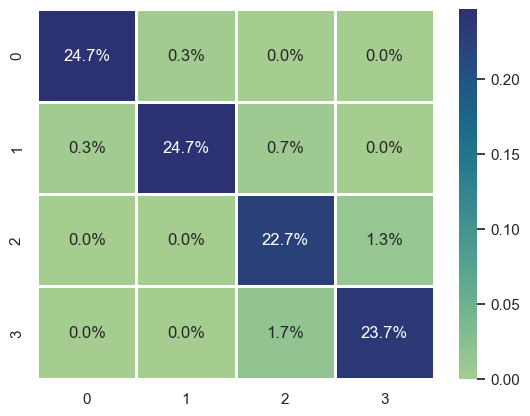

In [156]:
# Model Creation
logistic.fit(mod_x_train, mod_y_train)

# Predict the test data for checking accuracy
modified_log_prediction = logistic.predict(mod_x_test)

# Checking for the Accuracy of the Model Using Classification Report
print(classification_report(mod_y_test, modified_log_prediction))
revealer = confusion_matrix(modified_log_prediction, mod_y_test)

sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', fmt='.1%', linewidth=1)

Narrowing down the variables to the weightiest ones is insignificant to the model accuracy.

However, to reduce the noise in the modelling, we will work with the reduced set of inputs, returning a 96% accuracy rate.